In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv('./dataset_minute.csv')

**Since we are using nifty50 and as there is no volume of the index funds we have to make the following indicators**
**We will use "*ta*" library for that to easily calculate all the indicators**


**These are the following indicators:**
    
    SMA_50, SMA_200

    EMA_12, EMA_26

    MACD, MACD_Signal, MACD_Diff

    RSI

    Momentum

    BB_Upper, BB_Lower, BB_Middle

    ATR

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-01-09 09:15:00,8285.45,8295.90,8285.45,8292.10,0
1,2015-01-09 09:16:00,8292.60,8293.60,8287.20,8288.15,0
2,2015-01-09 09:17:00,8287.40,8293.90,8287.40,8293.90,0
3,2015-01-09 09:18:00,8294.25,8300.65,8293.90,8300.65,0
4,2015-01-09 09:19:00,8300.60,8301.30,8298.75,8301.20,0


**Importing "ta" to calculate all the required indicators**

In [7]:
import ta


df['SMA_50'] = ta.trend.sma_indicator(close=df['Close'], window=50)
df['SMA_200'] = ta.trend.sma_indicator(close=df['Close'], window=200)

df['EMA_12'] = ta.trend.ema_indicator(close=df['Close'], window=12)
df['EMA_26'] = ta.trend.ema_indicator(close=df['Close'], window=26)

macd = ta.trend.MACD(close=df['Close'], window_slow=26, window_fast=12, window_sign=9)
df['MACD'] = macd.macd()
df['MACD_Signal'] = macd.macd_signal()
df['MACD_Diff'] = macd.macd_diff()


df['RSI'] = ta.momentum.rsi(close=df['Close'], window=14)
df['Momentum'] = ta.momentum.AwesomeOscillatorIndicator(high=df['High'], low=df['Low']).awesome_oscillator()  # Awesome Oscillator


bb = ta.volatility.BollingerBands(close=df['Close'], window=20, window_dev=2)
df['BB_Middle'] = bb.bollinger_mavg()
df['BB_Upper'] = bb.bollinger_hband()
df['BB_Lower'] = bb.bollinger_lband()

df['ATR'] = ta.volatility.average_true_range(high=df['High'], low=df['Low'], close=df['Close'], window=14)



**Removing first 200 datapoints as SMA 200 will contain null on all , also we have a huge dataset without null so it is safe to remove**

In [8]:
df=df.iloc[199:]

In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'SMA_50', 'SMA_200',
       'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff', 'RSI',
       'Momentum', 'BB_Middle', 'BB_Upper', 'BB_Lower', 'ATR'],
      dtype='object')

In [10]:
#df = df.iloc[:-930000]


**We wil perform some EDA on this**

In [11]:
df.describe()

,Open,High,Low,Close,Volume,SMA_50,SMA_200,EMA_12,EMA_26,MACD,MACD_Signal,MACD_Diff,RSI,Momentum,BB_Middle,BB_Upper,BB_Lower,ATR
count,932747.000000,932747.000000,932747.000000,932747.000000,932747.0,932747.000000,932747.000000,932747.000000,932747.000000,932747.000000,932747.000000,932747.000000,932747.000000,932747.000000,932747.000000,932747.000000,932747.000000,932747.000000
mean,13624.918096,13627.721692,13622.082066,13624.894716,0.0,13624.492147,13623.266223,13624.804190,13624.689187,0.115004,0.114917,0.000086,50.621060,0.238568,13624.738334,13640.540643,13608.936026,5.803585
std,5047.752031,5048.665025,5046.811851,5047.763651,0.0,5047.546026,5046.881544,5047.709659,5047.642419,7.641704,7.207737,2.270389,12.301238,19.326081,5047.678476,5052.112178,5043.310447,3.877612
min,6846.800000,6860.900000,6826.350000,6848.100000,0.0,6907.067000,6936.944500,6885.941111,6895.100785,-261.813155,-231.430459,-100.929147,0.975063,-707.841765,6892.995000,6915.955028,6842.693025,0.027717
25%,9431.400000,9433.550000,9429.425000,9431.375000,0.0,9432.066500,9424.440125,9431.176261,9431.205655,-2.372978,-2.255415,-0.795845,42.429764,-6.012206,9430.872500,9441.840698,9416.288419,3.217141
50%,11562.150000,11564.400000,11559.800000,11562.100000,0.0,11561.407000,11557.790750,11561.846367,11561.724716,0.228782,0.220316,-0.014016,50.798590,0.488088,11561.937500,11573.643008,11550.589824,4.851681
75%,17607.650000,17610.950000,17603.900000,17607.550000,0.0,17606.529500,17607.346250,17607.172162,17607.017561,2.742522,2.609150,0.759058,58.891558,6.779044,17607.143750,17628.941977,17586.675911,7.191176
max,26273.400000,26277.350000,26270.600000,26273.450000,0.0,26265.051000,26242.757750,26268.261191,26266.569728,181.208783,169.546054,75.572611,99.862802,541.358235,26267.395000,26283.346895,26261.433798,83.241696


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932747 entries, 199 to 932945
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         932747 non-null  object 
 1   Open         932747 non-null  float64
 2   High         932747 non-null  float64
 3   Low          932747 non-null  float64
 4   Close        932747 non-null  float64
 5   Volume       932747 non-null  int64  
 6   SMA_50       932747 non-null  float64
 7   SMA_200      932747 non-null  float64
 8   EMA_12       932747 non-null  float64
 9   EMA_26       932747 non-null  float64
 10  MACD         932747 non-null  float64
 11  MACD_Signal  932747 non-null  float64
 12  MACD_Diff    932747 non-null  float64
 13  RSI          932747 non-null  float64
 14  Momentum     932747 non-null  float64
 15  BB_Middle    932747 non-null  float64
 16  BB_Upper     932747 non-null  float64
 17  BB_Lower     932747 non-null  float64
 18  ATR          932747 no

In [13]:
df.isnull().sum()


Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
SMA_50         0
SMA_200        0
EMA_12         0
EMA_26         0
MACD           0
MACD_Signal    0
MACD_Diff      0
RSI            0
Momentum       0
BB_Middle      0
BB_Upper       0
BB_Lower       0
ATR            0
dtype: int64

**We can clearly see there is no null**
**So no need to handle any null value**

**Now we will plot some graph, so basic understand what we can grasp from them**


fig,axs=plt.subplots(2,3,figsize=(28,20))
axs[0,0].plot(df['Date'], df['SMA_50'])
axs[0,0].set_ylabel('SMA')
axs[0,1].plot(df['Date'], df['EMA_12'])
axs[0,1].set_ylabel('EMA')
axs[0,2].plot(df['Date'], df['Momentum'])
axs[0,2].set_ylabel('Momentum')
axs[1,0].plot(df['Date'], df['MACD'])
axs[1,0].set_ylabel('MACD')
axs[1,1].plot(df['Date'], df['RSI'])
axs[1,1].set_ylabel('RSI')
axs[1,2].plot(df['Date'], df['ATR'])
axs[1,2].set_ylabel('ATR')



**From here we can roughly see that SMA&EMA are kindoff co-linear, and MACD&Momentum too**

**Also on sudden huge increase of MAC/ATR/Momentum we can visualise that the SMA & EMA have dropped**

**We will check corelation of the data using corr, but for that we would have to remove the date and volume column**

In [14]:
af=df.drop(["Date","Volume"],axis=1)

In [15]:
import seaborn as sns

In [16]:
corr=af.corr()

In [17]:
corr

,Open,High,Low,Close,SMA_50,SMA_200,EMA_12,EMA_26,MACD,MACD_Signal,MACD_Diff,RSI,Momentum,BB_Middle,BB_Upper,BB_Lower,ATR
Open,1.000000,1.000000,1.000000,0.999999,0.999986,0.999940,0.999998,0.999995,0.010782,0.011465,-0.000107,0.010180,0.008873,0.999995,0.999988,0.999989,0.484291
High,1.000000,1.000000,1.000000,1.000000,0.999986,0.999941,0.999998,0.999995,0.010774,0.011436,-0.000041,0.010307,0.008855,0.999995,0.999988,0.999988,0.484576
Low,1.000000,1.000000,1.000000,1.000000,0.999986,0.999939,0.999998,0.999995,0.010866,0.011521,-0.000002,0.010380,0.008937,0.999995,0.999987,0.999990,0.483996
Close,0.999999,1.000000,1.000000,1.000000,0.999986,0.999940,0.999998,0.999995,0.010840,0.011479,0.000046,0.010473,0.008898,0.999995,0.999987,0.999989,0.484288
SMA_50,0.999986,0.999986,0.999986,0.999986,1.000000,0.999966,0.999992,0.999997,0.005680,0.006661,-0.002026,0.006574,0.003972,0.999995,0.999989,0.999987,0.484740
SMA_200,0.999940,0.999941,0.999939,0.999940,0.999966,1.000000,0.999947,0.999956,0.003292,0.003658,-0.000534,0.005082,0.002514,0.999951,0.999949,0.999940,0.485953
EMA_12,0.999998,0.999998,0.999998,0.999998,0.999992,0.999947,1.000000,0.999999,0.009556,0.010636,-0.001602,0.009000,0.007572,0.999999,0.999992,0.999993,0.484366
EMA_26,0.999995,0.999995,0.999995,0.999995,0.999997,0.999956,0.999999,1.000000,0.008042,0.009190,-0.002108,0.007979,0.006099,1.000000,0.999993,0.999993,0.484500
MACD,0.010782,0.010774,0.010866,0.010840,0.005680,0.003292,0.009556,0.008042,1.000000,0.954917,0.334267,0.674740,0.973004,0.008387,0.008033,0.008742,-0.084427
MACD_Signal,0.011465,0.011436,0.011521,0.011479,0.006661,0.003658,0.010636,0.009190,0.954917,1.000000,0.039400,0.567364,0.884779,0.009735,0.009374,0.010097,-0.092424


**Correlation**

<Axes: >

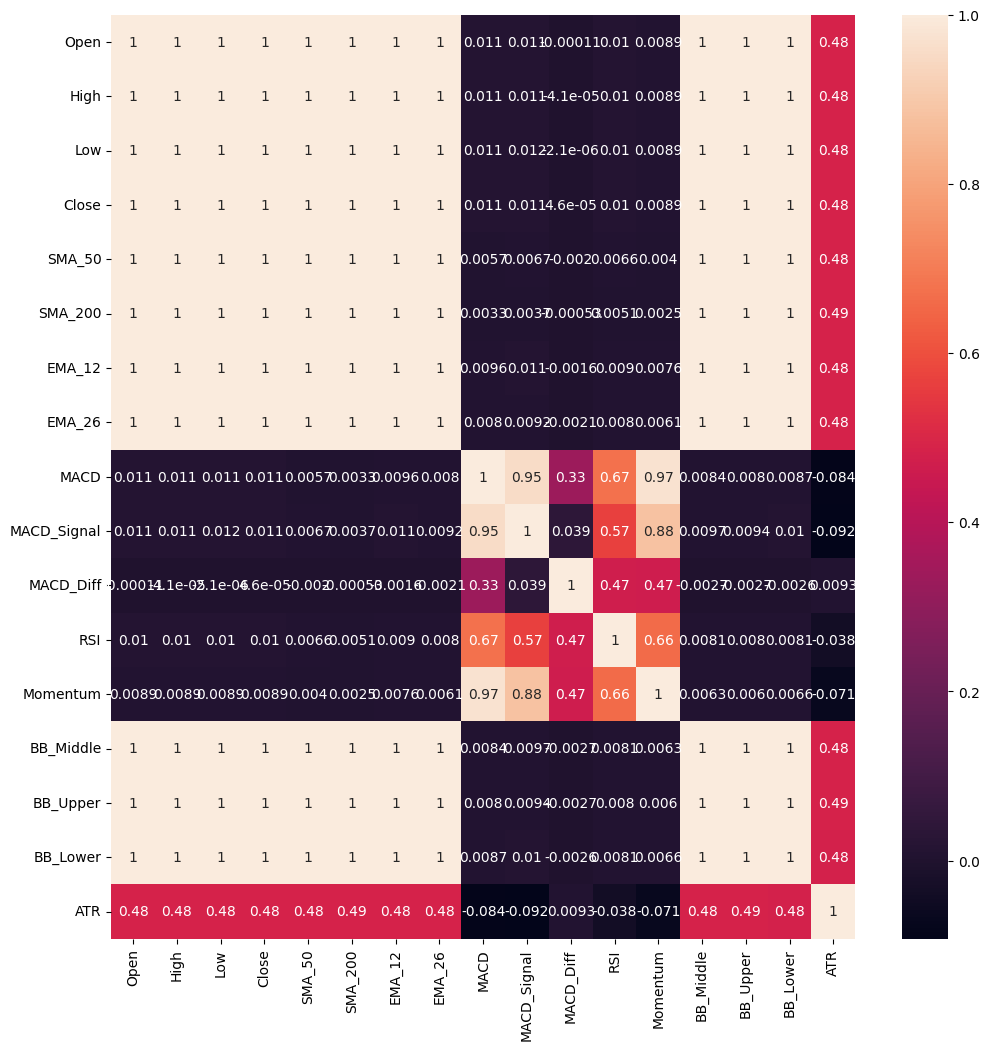

In [18]:
corr=af.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True)

**As expected we can see that SMA&EMA are highly corellated**
**MACD,MACD_Signal are correllted too**
**All BB is same too**
**So for linear regression we would have to remove some column for better prediction, so we will proceed with**
    
    SMA_50

    MACD_Signal

    RSI

    ATR
    

In [19]:
af.columns

Index(['Open', 'High', 'Low', 'Close', 'SMA_50', 'SMA_200', 'EMA_12', 'EMA_26',
       'MACD', 'MACD_Signal', 'MACD_Diff', 'RSI', 'Momentum', 'BB_Middle',
       'BB_Upper', 'BB_Lower', 'ATR'],
      dtype='object')

In [20]:
#linear_df=af.drop(['SMA_50','MACD_Signal','RSI','BB_Upper','ATR'],axis=1)
lineardf=af.drop(['Open', 'High', 'Low', 'SMA_200', 'EMA_12', 'EMA_26','MACD', 'MACD_Diff', 'Momentum', 'BB_Middle', 'BB_Lower','BB_Upper'],axis=1)


In [21]:
lineardf

,Close,SMA_50,MACD_Signal,RSI,ATR
199,8209.25,8231.955,-5.064565,38.064747,8.178270
200,8209.20,8230.956,-5.054368,38.024265,8.104822
201,8210.30,8229.988,-5.034842,39.547491,8.015192
202,8209.10,8228.994,-5.018163,38.437620,7.964107
203,8202.90,8227.870,-5.091621,33.246152,7.977385
...,...,...,...,...,...
932941,23568.10,23517.748,18.831749,60.198889,9.299272
932942,23567.40,23519.506,17.846242,59.659717,8.988609
932943,23576.50,23521.403,16.981542,64.154438,9.271566
932944,23568.10,23523.186,16.065169,57.757200,9.405740


<Axes: >

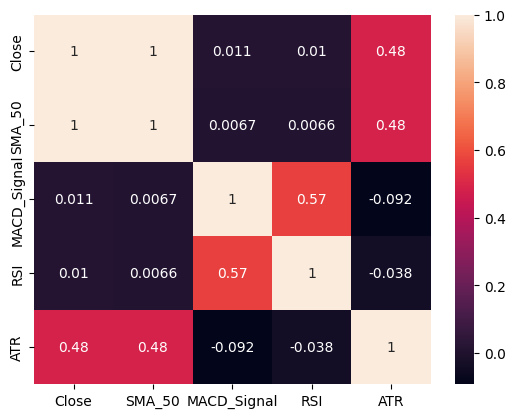

In [22]:
corr1=lineardf.corr()
sns.heatmap(corr1,annot=True)

**Now the correlation is significantly lower,and for linear regression it will work well**

**Let's apply Linear Regression**

In [23]:
lineardf['Close_1min']=lineardf['Close'].shift(-1)

In [24]:
lineardf=lineardf.iloc[:-1]

In [25]:
lineardf.loc[:, 'Direction_1min'] = (lineardf['Close_1min'] > lineardf['Close']).astype(int)


/tmp/ipykernel_88631/2496737026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineardf.loc[:, 'Direction_1min'] = (lineardf['Close_1min'] > lineardf['Close']).astype(int)


In [26]:
lineardf['delta'] = lineardf['Close_1min'] - lineardf['Close']
print(lineardf['delta'].describe())

count    932746.000000
mean          0.016461
std           6.688297
min        -756.150000
25%          -2.100000
50%           0.000000
75%           2.100000
max         559.100000
Name: delta, dtype: float64


/tmp/ipykernel_88631/3548087924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineardf['delta'] = lineardf['Close_1min'] - lineardf['Close']


<Axes: >

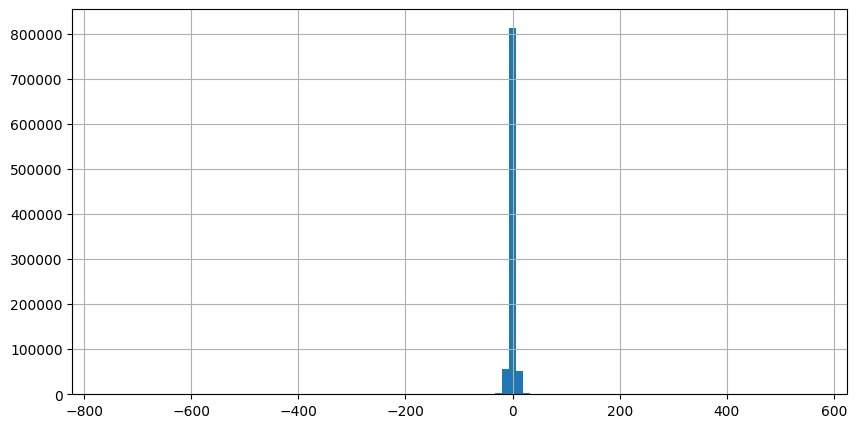

In [27]:
lineardf['delta'].hist(bins=100, figsize=(10, 5))


In [28]:
lineardf['delta'].abs().sort_values(ascending=False).head(10)


479782    756.15
477532    741.20
479032    593.65
868010    559.10
868385    550.05
477598    532.30
477907    526.40
168412    507.75
477157    505.15
912320    415.20
Name: delta, dtype: float64

In [29]:
lineardf['delta'].describe(percentiles=[0.95, 0.99, 0.999])


count    932746.000000
mean          0.016461
std           6.688297
min        -756.150000
50%           0.000000
95%           7.400000
99%          14.950000
99.9%        43.762750
max         559.100000
Name: delta, dtype: float64

In [30]:
lineardf['Close_1min'] = np.where(
    lineardf['Close_1min'] > lineardf['Close'] + 15,
    lineardf['Close'] + 15,
    np.where(
        lineardf['Close_1min'] < lineardf['Close'] - 15,
        lineardf['Close'] - 15,
        lineardf['Close_1min']
    )
)

/tmp/ipykernel_88631/3677038186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineardf['Close_1min'] = np.where(


In [31]:
lineardf['delta'] = lineardf['Close_1min'] - lineardf['Close']
print(lineardf['delta'].describe())

count    932746.000000
mean          0.003226
std           4.538304
min         -15.000000
25%          -2.100000
50%           0.000000
75%           2.100000
max          15.000000
Name: delta, dtype: float64


/tmp/ipykernel_88631/3548087924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineardf['delta'] = lineardf['Close_1min'] - lineardf['Close']


In [32]:
lineardf=lineardf.drop(['Close','delta'],axis=1)

In [33]:
lineardf

,SMA_50,MACD_Signal,RSI,ATR,Close_1min,Direction_1min
199,8231.955,-5.064565,38.064747,8.178270,8209.20,0
200,8230.956,-5.054368,38.024265,8.104822,8210.30,1
201,8229.988,-5.034842,39.547491,8.015192,8209.10,0
202,8228.994,-5.018163,38.437620,7.964107,8202.90,0
203,8227.870,-5.091621,33.246152,7.977385,8204.75,1
...,...,...,...,...,...,...
932940,23515.925,19.760832,60.671674,9.737677,23568.10,0
932941,23517.748,18.831749,60.198889,9.299272,23567.40,0
932942,23519.506,17.846242,59.659717,8.988609,23576.50,1
932943,23521.403,16.981542,64.154438,9.271566,23568.10,0


In [34]:
lineardf.columns

Index(['SMA_50', 'MACD_Signal', 'RSI', 'ATR', 'Close_1min', 'Direction_1min'], dtype='object')

In [35]:
X=lineardf.drop(["Close_1min","Direction_1min"],axis=1)


In [36]:
Y_reg=lineardf['Close_1min']


In [37]:
Y_class=lineardf['Direction_1min']

In [38]:
X

,SMA_50,MACD_Signal,RSI,ATR
199,8231.955,-5.064565,38.064747,8.178270
200,8230.956,-5.054368,38.024265,8.104822
201,8229.988,-5.034842,39.547491,8.015192
202,8228.994,-5.018163,38.437620,7.964107
203,8227.870,-5.091621,33.246152,7.977385
...,...,...,...,...
932940,23515.925,19.760832,60.671674,9.737677
932941,23517.748,18.831749,60.198889,9.299272
932942,23519.506,17.846242,59.659717,8.988609
932943,23521.403,16.981542,64.154438,9.271566


In [39]:
Y_reg

199        8209.20
200        8210.30
201        8209.10
202        8202.90
203        8204.75
            ...   
932940    23568.10
932941    23567.40
932942    23576.50
932943    23568.10
932944    23563.15
Name: Close_1min, Length: 932746, dtype: float64

In [40]:
Y_class

199       0
200       1
201       0
202       0
203       1
         ..
932940    0
932941    0
932942    1
932943    0
932944    0
Name: Direction_1min, Length: 932746, dtype: int64

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [42]:
from sklearn.model_selection import train_test_split


In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_reg,test_size=0.33)

In [44]:
X_train

,SMA_50,MACD_Signal,RSI,ATR
113314,7742.778,-1.887299,39.099573,2.578486
796607,19415.575,-0.699050,47.226831,3.613533
654955,17410.614,-1.783549,54.486314,9.785590
602443,15899.213,-1.982128,61.303886,4.139054
624887,18151.623,4.335202,57.695952,5.621231
...,...,...,...,...
133678,8214.136,0.453707,60.104197,1.561535
653247,17731.891,-7.180336,51.603922,9.469661
172304,7994.499,0.670342,51.446371,2.297072
927984,23012.219,1.140688,47.182499,10.428272


In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [46]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [47]:
linear=LinearRegression()

In [48]:
linear.fit(X_train,Y_train)

LinearRegression()

In [49]:
Y_predict=linear.predict(X_test)

In [50]:
from sklearn.metrics import r2_score
print(r2_score(Y_predict,Y_test))

0.9999957082622353


**As we can see the prediction is definetly more than 99% and it might look impressive but there is a huge blunder "difference" between current and next minute close price is so low compared to the the "actual" close price, so even if the model says t+1 close is equal to the t, it will me mostly correct**

In [51]:
lineardf

,SMA_50,MACD_Signal,RSI,ATR,Close_1min,Direction_1min
199,8231.955,-5.064565,38.064747,8.178270,8209.20,0
200,8230.956,-5.054368,38.024265,8.104822,8210.30,1
201,8229.988,-5.034842,39.547491,8.015192,8209.10,0
202,8228.994,-5.018163,38.437620,7.964107,8202.90,0
203,8227.870,-5.091621,33.246152,7.977385,8204.75,1
...,...,...,...,...,...,...
932940,23515.925,19.760832,60.671674,9.737677,23568.10,0
932941,23517.748,18.831749,60.198889,9.299272,23567.40,0
932942,23519.506,17.846242,59.659717,8.988609,23576.50,1
932943,23521.403,16.981542,64.154438,9.271566,23568.10,0


In [52]:
logidf=lineardf

In [53]:
#logidf=logidf.iloc[:-900000]

In [54]:
#fig, axes = plt.subplots(2, 2, figsize=(30, 20))

#axes[0, 0].scatter(logidf['ATR'],logidf['Close_1min'],c=logidf['Direction_1min'])
#axes[0, 1].scatter(logidf['ATR'],logidf['MACD_Signal'],c=logidf['Direction_1min'])
#axes[0, 2].scatter(logidf['ATR'],logidf['RSI'],c=logidf['Direction_1min'])
#axes[1, 0].scatter(logidf['ATR'],logidf['SMA_50'],c=logidf['Direction_1min'])
#axes[1, 1].scatter(logidf['Close_1min'],logidf['MACD_Signal'],c=logidf['Direction_1min'])
##axes[0, 0].scatter(logidf['Close_1min'],logidf['RSI'],c=logidf['Direction_1min'])
#axes[2, 0].scatter(logidf['Close_1min'],logidf['SMA_50'],c=logidf['Direction_1min'])
#axes[2, 1].scatter(logidf['MACD_Signal'],logidf['RSI'],c=logidf['Direction_1min'])
#axes[2, 2].scatter(logidf['MACD_Signal'],logidf['SMA_50'],c=logidf['Direction_1min'])
##axes[0, 1].scatter(logidf['RSI'],logidf['SMA_50'],c=logidf['Direction_1min'])




**There is no direct relationship between any feature to it's class that's why we are not seeing any direct cluster formation, As they are not linearry seperable, So we will not waste time on Logistic and we will head to DT classifier**

In [55]:
logidf.drop('Close_1min',axis=1,inplace=True)

In [56]:
logidf

,SMA_50,MACD_Signal,RSI,ATR,Direction_1min
199,8231.955,-5.064565,38.064747,8.178270,0
200,8230.956,-5.054368,38.024265,8.104822,1
201,8229.988,-5.034842,39.547491,8.015192,0
202,8228.994,-5.018163,38.437620,7.964107,0
203,8227.870,-5.091621,33.246152,7.977385,1
...,...,...,...,...,...
932940,23515.925,19.760832,60.671674,9.737677,0
932941,23517.748,18.831749,60.198889,9.299272,0
932942,23519.506,17.846242,59.659717,8.988609,1
932943,23521.403,16.981542,64.154438,9.271566,0


In [57]:
X=logidf.drop('Direction_1min',axis=1)
Y=logidf['Direction_1min']

In [58]:
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
tree=DecisionTreeClassifier(max_depth=5)
tree.fit(X_train,Y_train)


DecisionTreeClassifier(max_depth=5)

In [60]:
Y_predict=tree.predict(X_test)

In [61]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52     93502
           1       0.51      0.48      0.50     93048

    accuracy                           0.51    186550
   macro avg       0.51      0.51      0.51    186550
weighted avg       0.51      0.51      0.51    186550



**We will try with all the features**

In [62]:
dtf=af

In [63]:
dtf['Close_1min']=dtf['Close'].shift(-1)
dtf=dtf.iloc[:-1]
dtf.loc[:,'Direction_1min']=(dtf['Close_1min']>dtf['Close']).astype(int)

/tmp/ipykernel_88631/392567723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf.loc[:,'Direction_1min']=(dtf['Close_1min']>dtf['Close']).astype(int)


In [64]:
dtf['Close_1min']=np.where(
    dtf['Close_1min']>dtf['Close'] +15,
    dtf['Close'] + 15,
    np.where(
        dtf['Close_1min'] < dtf['Close'] -15,
        dtf['Close'] -15,
        dtf['Close_1min']
    )
)

/tmp/ipykernel_88631/1424226584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf['Close_1min']=np.where(


In [65]:
dtf.drop('Close_1min',inplace=True,axis=1)

/tmp/ipykernel_88631/3769105926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf.drop('Close_1min',inplace=True,axis=1)


In [66]:
dtf

,Open,High,Low,Close,SMA_50,SMA_200,EMA_12,EMA_26,MACD,MACD_Signal,MACD_Diff,RSI,Momentum,BB_Middle,BB_Upper,BB_Lower,ATR,Direction_1min
199,8212.55,8219.10,8202.10,8209.25,8231.955,8268.68550,8215.159813,8220.061019,-4.901206,-5.064565,0.163359,38.064747,-6.728971,8218.2425,8227.929051,8208.555949,8.178270,0
200,8209.50,8211.95,8204.80,8209.20,8230.956,8268.27100,8214.242919,8219.256499,-5.013581,-5.054368,0.040787,38.024265,-6.225294,8217.4600,8227.409955,8207.510045,8.104822,1
201,8209.65,8210.60,8203.75,8210.30,8229.988,8267.88175,8213.636316,8218.593055,-4.956739,-5.034842,0.078103,39.547491,-6.561176,8217.0075,8227.386386,8206.628614,8.015192,0
202,8210.55,8212.05,8204.75,8209.10,8228.994,8267.45775,8212.938421,8217.889866,-4.951444,-5.018163,0.066718,38.437620,-7.164706,8216.2475,8226.605129,8205.889871,7.964107,0
203,8209.15,8209.15,8201.00,8202.90,8227.870,8266.96900,8211.394049,8216.779505,-5.385457,-5.091621,-0.293835,33.246152,-7.211765,8215.3300,8226.929112,8203.730888,7.977385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932940,23569.70,23570.90,23565.30,23568.75,23515.925,23539.06950,23568.628910,23552.258691,16.370219,19.760832,-3.390613,60.671674,35.494559,23564.6725,23599.183013,23530.161987,9.737677,0
932941,23569.45,23570.60,23567.00,23568.10,23517.748,23538.81850,23568.547539,23553.432121,15.115418,18.831749,-3.716331,60.198889,31.870441,23566.9525,23595.532694,23538.372306,9.299272,0
932942,23568.10,23570.25,23565.30,23567.40,23519.506,23538.50500,23568.370995,23554.466779,13.904216,17.846242,-3.942027,59.659717,28.157647,23568.6500,23592.750996,23544.549004,8.988609,1
932943,23569.00,23578.35,23565.40,23576.50,23521.403,23538.27925,23569.621611,23556.098869,13.522741,16.981542,-3.458801,64.154438,25.390294,23570.6050,23590.164702,23551.045298,9.271566,0


In [67]:
#dtf=dtf.iloc[:-900000]

In [68]:
X=dtf.drop('Direction_1min',axis=1)
Y=dtf['Direction_1min']

In [69]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [70]:
tree=DecisionTreeClassifier(max_depth=5)
tree.fit(X_train,Y_train)
Y_predict=tree.predict(X_test)
print(classification_report(Y_test,Y_predict))

KeyboardInterrupt: 

**Ok so here we are getting approx 53% accuracy and**

**Let's try grid search CV now**

In [71]:
patam_grid={
    'criterion': ['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[None,5,10,15,20,25],
    'max_features':[None,'sqrt','log2'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=dt,param_grid=patam_grid,cv=5,scoring='accuracy',n_jobs=-1,verbose=2)

In [ ]:
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, max_features=sqrt, splitter=random; total time=   7.7s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, splitter=random; total time=   7.7s
[CV] END criterion=gini, max_depth=None, max_features=None, splitter=random; total time=  15.8s
[CV] END criterion=gini, max_depth=None, max_features=None, splitter=random; total time=  16.8s
[CV] END criterion=gini, max_depth=None, max_features=None, splitter=random; total time=  18.0s
[CV] END criterion=gini, max_depth=None, max_features=None, splitter=random; total time=  17.9s
[CV] END criterion=gini, max_depth=None, max_features=None, splitter=random; total time=  19.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, splitter=random; total time=   4.6s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, splitter=random; total time=   5.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, splitter=rando

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20, 25],
                         'max_features': [None, 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2', 'splitter': 'best'}
Best Score: 0.5106794979135361


In [ ]:
best_dt=DecisionTreeClassifier(criterion='gini',max_depth=15,max_features='log2',splitter='best')

In [ ]:
best_dt.fit(X_train,Y_train)
Y_predict=best_dt.predict(X_test)
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.51      0.54      0.52     93679
           1       0.51      0.49      0.50     92871

    accuracy                           0.51    186550
   macro avg       0.51      0.51      0.51    186550
weighted avg       0.51      0.51      0.51    186550



**Even after Grid Search CV i think at best Decision tree can only do this,so we should now use some another model like ARIMA**

In [ ]:
ar=dtf

In [ ]:
ar

,Open,High,Low,Close,SMA_50,SMA_200,EMA_12,EMA_26,MACD,MACD_Signal,MACD_Diff,RSI,Momentum,BB_Middle,BB_Upper,BB_Lower,ATR,Direction_1min
199,8212.55,8219.10,8202.10,8209.25,8231.955,8268.68550,8215.159813,8220.061019,-4.901206,-5.064565,0.163359,38.064747,-6.728971,8218.2425,8227.929051,8208.555949,8.178270,0
200,8209.50,8211.95,8204.80,8209.20,8230.956,8268.27100,8214.242919,8219.256499,-5.013581,-5.054368,0.040787,38.024265,-6.225294,8217.4600,8227.409955,8207.510045,8.104822,1
201,8209.65,8210.60,8203.75,8210.30,8229.988,8267.88175,8213.636316,8218.593055,-4.956739,-5.034842,0.078103,39.547491,-6.561176,8217.0075,8227.386386,8206.628614,8.015192,0
202,8210.55,8212.05,8204.75,8209.10,8228.994,8267.45775,8212.938421,8217.889866,-4.951444,-5.018163,0.066718,38.437620,-7.164706,8216.2475,8226.605129,8205.889871,7.964107,0
203,8209.15,8209.15,8201.00,8202.90,8227.870,8266.96900,8211.394049,8216.779505,-5.385457,-5.091621,-0.293835,33.246152,-7.211765,8215.3300,8226.929112,8203.730888,7.977385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932940,23569.70,23570.90,23565.30,23568.75,23515.925,23539.06950,23568.628910,23552.258691,16.370219,19.760832,-3.390613,60.671674,35.494559,23564.6725,23599.183013,23530.161987,9.737677,0
932941,23569.45,23570.60,23567.00,23568.10,23517.748,23538.81850,23568.547539,23553.432121,15.115418,18.831749,-3.716331,60.198889,31.870441,23566.9525,23595.532694,23538.372306,9.299272,0
932942,23568.10,23570.25,23565.30,23567.40,23519.506,23538.50500,23568.370995,23554.466779,13.904216,17.846242,-3.942027,59.659717,28.157647,23568.6500,23592.750996,23544.549004,8.988609,1
932943,23569.00,23578.35,23565.40,23576.50,23521.403,23538.27925,23569.621611,23556.098869,13.522741,16.981542,-3.458801,64.154438,25.390294,23570.6050,23590.164702,23551.045298,9.271566,0


In [72]:
df

,Date,Open,High,Low,Close,Volume,SMA_50,SMA_200,EMA_12,EMA_26,MACD,MACD_Signal,MACD_Diff,RSI,Momentum,BB_Middle,BB_Upper,BB_Lower,ATR
199,2015-01-09 12:34:00,8212.55,8219.10,8202.10,8209.25,0,8231.955,8268.68550,8215.159813,8220.061019,-4.901206,-5.064565,0.163359,38.064747,-6.728971,8218.2425,8227.929051,8208.555949,8.178270
200,2015-01-09 12:35:00,8209.50,8211.95,8204.80,8209.20,0,8230.956,8268.27100,8214.242919,8219.256499,-5.013581,-5.054368,0.040787,38.024265,-6.225294,8217.4600,8227.409955,8207.510045,8.104822
201,2015-01-09 12:36:00,8209.65,8210.60,8203.75,8210.30,0,8229.988,8267.88175,8213.636316,8218.593055,-4.956739,-5.034842,0.078103,39.547491,-6.561176,8217.0075,8227.386386,8206.628614,8.015192
202,2015-01-09 12:37:00,8210.55,8212.05,8204.75,8209.10,0,8228.994,8267.45775,8212.938421,8217.889866,-4.951444,-5.018163,0.066718,38.437620,-7.164706,8216.2475,8226.605129,8205.889871,7.964107
203,2015-01-09 12:38:00,8209.15,8209.15,8201.00,8202.90,0,8227.870,8266.96900,8211.394049,8216.779505,-5.385457,-5.091621,-0.293835,33.246152,-7.211765,8215.3300,8226.929112,8203.730888,7.977385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932941,2025-02-07 15:25:00,23569.45,23570.60,23567.00,23568.10,0,23517.748,23538.81850,23568.547539,23553.432121,15.115418,18.831749,-3.716331,60.198889,31.870441,23566.9525,23595.532694,23538.372306,9.299272
932942,2025-02-07 15:26:00,23568.10,23570.25,23565.30,23567.40,0,23519.506,23538.50500,23568.370995,23554.466779,13.904216,17.846242,-3.942027,59.659717,28.157647,23568.6500,23592.750996,23544.549004,8.988609
932943,2025-02-07 15:27:00,23569.00,23578.35,23565.40,23576.50,0,23521.403,23538.27925,23569.621611,23556.098869,13.522741,16.981542,-3.458801,64.154438,25.390294,23570.6050,23590.164702,23551.045298,9.271566
932944,2025-02-07 15:28:00,23577.05,23578.60,23567.45,23568.10,0,23523.186,23537.99775,23569.387517,23556.987842,12.399675,16.065169,-3.665494,57.757200,23.419412,23571.8250,23587.092859,23556.557141,9.405740


In [73]:
arf=df

arf['Close_1min']=arf['Close'].shift(-1)
arf=arf.iloc[:-1]
arf.loc[:,'Direction_1min']=(arf['Close_1min']>arf['Close']).astype(int)

arf['Close_1min']=np.where(
    arf['Close_1min']>arf['Close'] +15,
    arf['Close'] + 15,
    np.where(
        arf['Close_1min'] < arf['Close'] -15,
        arf['Close'] -15,
        arf['Close_1min']
    )
)

/tmp/ipykernel_88631/3993357372.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arf.loc[:,'Direction_1min']=(arf['Close_1min']>arf['Close']).astype(int)
/tmp/ipykernel_88631/3993357372.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arf['Close_1min']=np.where(


In [74]:
arf

,Date,Open,High,Low,Close,Volume,SMA_50,SMA_200,EMA_12,EMA_26,...,MACD_Signal,MACD_Diff,RSI,Momentum,BB_Middle,BB_Upper,BB_Lower,ATR,Close_1min,Direction_1min
199,2015-01-09 12:34:00,8212.55,8219.10,8202.10,8209.25,0,8231.955,8268.68550,8215.159813,8220.061019,...,-5.064565,0.163359,38.064747,-6.728971,8218.2425,8227.929051,8208.555949,8.178270,8209.20,0
200,2015-01-09 12:35:00,8209.50,8211.95,8204.80,8209.20,0,8230.956,8268.27100,8214.242919,8219.256499,...,-5.054368,0.040787,38.024265,-6.225294,8217.4600,8227.409955,8207.510045,8.104822,8210.30,1
201,2015-01-09 12:36:00,8209.65,8210.60,8203.75,8210.30,0,8229.988,8267.88175,8213.636316,8218.593055,...,-5.034842,0.078103,39.547491,-6.561176,8217.0075,8227.386386,8206.628614,8.015192,8209.10,0
202,2015-01-09 12:37:00,8210.55,8212.05,8204.75,8209.10,0,8228.994,8267.45775,8212.938421,8217.889866,...,-5.018163,0.066718,38.437620,-7.164706,8216.2475,8226.605129,8205.889871,7.964107,8202.90,0
203,2015-01-09 12:38:00,8209.15,8209.15,8201.00,8202.90,0,8227.870,8266.96900,8211.394049,8216.779505,...,-5.091621,-0.293835,33.246152,-7.211765,8215.3300,8226.929112,8203.730888,7.977385,8204.75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932940,2025-02-07 15:24:00,23569.70,23570.90,23565.30,23568.75,0,23515.925,23539.06950,23568.628910,23552.258691,...,19.760832,-3.390613,60.671674,35.494559,23564.6725,23599.183013,23530.161987,9.737677,23568.10,0
932941,2025-02-07 15:25:00,23569.45,23570.60,23567.00,23568.10,0,23517.748,23538.81850,23568.547539,23553.432121,...,18.831749,-3.716331,60.198889,31.870441,23566.9525,23595.532694,23538.372306,9.299272,23567.40,0
932942,2025-02-07 15:26:00,23568.10,23570.25,23565.30,23567.40,0,23519.506,23538.50500,23568.370995,23554.466779,...,17.846242,-3.942027,59.659717,28.157647,23568.6500,23592.750996,23544.549004,8.988609,23576.50,1
932943,2025-02-07 15:27:00,23569.00,23578.35,23565.40,23576.50,0,23521.403,23538.27925,23569.621611,23556.098869,...,16.981542,-3.458801,64.154438,25.390294,23570.6050,23590.164702,23551.045298,9.271566,23568.10,0


In [77]:
arf=arf.drop(['Open', 'High', 'Low', 'Volume', 'SMA_50', 'SMA_200',
       'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Diff', 'RSI',
       'Momentum', 'BB_Middle', 'BB_Upper', 'BB_Lower', 'ATR', 'Close_1min',
       'Direction_1min'],axis=1)

In [86]:
arf

,Date,Close
199,2015-01-09 12:34:00,8209.25
200,2015-01-09 12:35:00,8209.20
201,2015-01-09 12:36:00,8210.30
202,2015-01-09 12:37:00,8209.10
203,2015-01-09 12:38:00,8202.90
...,...,...
932940,2025-02-07 15:24:00,23568.75
932941,2025-02-07 15:25:00,23568.10
932942,2025-02-07 15:26:00,23567.40
932943,2025-02-07 15:27:00,23576.50


In [81]:
arf['Date']=pd.to_datetime(arf['Date'])


In [88]:
arf.set_index('Date',inplace=True)

In [89]:
arf

,Close
Date,
2015-01-09 12:34:00,8209.25
2015-01-09 12:35:00,8209.20
2015-01-09 12:36:00,8210.30
2015-01-09 12:37:00,8209.10
2015-01-09 12:38:00,8202.90
...,...
2025-02-07 15:24:00,23568.75
2025-02-07 15:25:00,23568.10
2025-02-07 15:26:00,23567.40


In [ ]:
from statsmodels.tsa.arima.model import ARIMA